<a href="https://colab.research.google.com/github/Mueez-lab/cifar10-image-classifier/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets, layers, models


In [4]:
(x_train , y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
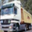

In [5]:
x_train[1]

In [6]:
# Convert this into 1D array
# many machine learning tools (like plotting functions, model evaluation functions, or one-hot encoders) expect a 1D array
y_train = y_train.reshape(-1,)
y_train[:9]

array([6, 9, 9, 4, 1, 1, 2, 7, 8], dtype=uint8)

In [7]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'hourse', 'ship', 'truck']

In [49]:
def plot_sample(x, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index].item()])


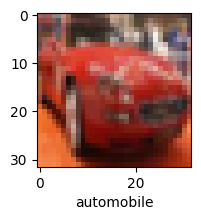

In [47]:
plot_sample(  x_train, y_train, 5)

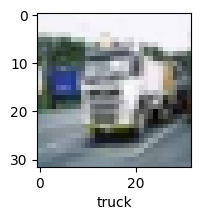

In [10]:
plot_sample(  x_train, y_train, 1000)

In [11]:
# We will normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [24]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)), # 32, 32 from dataset and color channel is of 3 thats why
    layers.Dense(3000, activation='relu'), # 1st layer
    layers.Dense(1000, activation='relu'), # 2nd layer
    layers.Dense(10, activation='softmax') # Output layer has 10 classes thats why
])

ann.compile(
    optimizer="adam",  # or Adam()
    loss="sparse_categorical_crossentropy",  # because labels are integers, not one-hot
    metrics=["accuracy"]  # to monitor training accuracy
)

ann.fit(x_train, y_train, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 350s 223ms/step - accuracy: 0.2699 - loss: 2.2037
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 363s 232ms/step - accuracy: 0.3935 - loss: 1.6936
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 355s 215ms/step - accuracy: 0.4286 - loss: 1.5980
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 345s 221ms/step - accuracy: 0.4511 - loss: 1.5424
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 377s 217ms/step - accuracy: 0.4633 - loss: 1.5045


In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.43      0.50      1000
           1       0.59      0.58      0.59      1000
           2       0.33      0.37      0.35      1000
           3       0.35      0.28      0.31      1000
           4       0.41      0.40      0.40      1000
           5       0.43      0.30      0.36      1000
           6       0.40      0.68      0.50      1000
           7       0.63      0.41      0.50      1000
           8       0.53      0.68      0.59      1000
           9       0.53      0.57      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.47     10000
weighted avg       0.48      0.47      0.47     10000



In [39]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Conv2D (32 filters): Detects basic features like edges, corners. The kernel_size=(3,3) is the size of the sliding window (filter) applied to the image.

# MaxPooling2D (2x2): Downsamples the image to reduce complexity and make features more location-invariant.

# Conv2D (64 filters): Deeper layer captures more abstract patterns like textures or parts of objects.

# MaxPooling2D: Again reduces dimensionality.

# Flatten: Converts the final feature map into a 1D vector.

# Dense(64): Fully connected layer to learn complex patterns.

# Dense(10, softmax): Output layer for 10 classes in CIFAR-10.

cnn.compile(
    optimizer="adam",  # or Adam()
    loss="sparse_categorical_crossentropy",  # because labels are integers, not one-hot
    metrics=["accuracy"]  # to monitor training accuracy
)




In [40]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 40ms/step - accuracy: 0.3746 - loss: 1.7121
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.6012 - loss: 1.1351
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.6518 - loss: 0.9995
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.6868 - loss: 0.9019
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.7090 - loss: 0.8382
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.7351 - loss: 0.7679
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7511 - loss: 0.7136
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.7655 - loss: 0.6764
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.7815 - loss: 0.6359
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.7926 - loss: 0.5904


In [32]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.4949 - loss: 1.4596


[1.456154704093933, 0.49079999327659607]

In [41]:
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      1000
           1       0.79      0.83      0.81      1000
           2       0.68      0.49      0.57      1000
           3       0.53      0.52      0.52      1000
           4       0.61      0.68      0.65      1000
           5       0.61      0.61      0.61      1000
           6       0.69      0.84      0.76      1000
           7       0.75      0.74      0.75      1000
           8       0.86      0.77      0.81      1000
           9       0.81      0.73      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [64]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[1.12634429e-04, 4.23536540e-06, 1.44724117e-03, 8.73744667e-01,
        3.29119248e-05, 1.15870893e-01, 4.45928145e-03, 2.07727469e-04,
        4.11028881e-03, 1.01646292e-05],
       [8.44320039e-06, 2.69544148e-03, 5.95355143e-09, 1.42572716e-07,
        5.26100483e-11, 1.96115857e-09, 1.41726861e-08, 1.59230976e-10,
        9.97294962e-01, 9.59055228e-07],
       [5.23293018e-02, 2.13837773e-01, 1.41120248e-03, 7.37723242e-03,
        4.56935773e-03, 6.09702256e-04, 1.44218956e-03, 7.53794564e-03,
        6.70090437e-01, 4.07948047e-02],
       [9.82789695e-01, 1.45720900e-03, 9.27384105e-03, 6.95194583e-04,
        5.24208706e-04, 1.11126894e-04, 2.87718343e-04, 3.50585992e-06,
        4.85438621e-03, 3.14423369e-06],
       [5.38722190e-07, 5.06194665e-05, 1.13120647e-02, 1.11255040e-02,
        1.38449762e-02, 1.48608582e-04, 9.63509142e-01, 6.04810157e-06,
        2.40085683e-06, 2.04965914e-07]], dtype=float32)

In [63]:
# Convert probability distributions into class labels as native Python integers
y_classes = [int(np.argmax(element)) for element in y_pred]

# Now y_classes will contain just the class numbers without the np.int64 type
print(y_classes[:5])


[3, 8, 8, 0, 6]


In [36]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

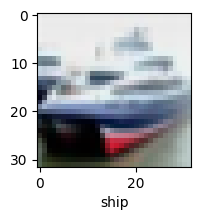

In [53]:
plot_sample(x_test,y_test,1)

In [51]:
y_test[:9]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3]], dtype=uint8)

In [71]:
def plot_sample_with_prediction(x, index, model):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    y_pred = cnn.predict(x[index:index+1])
    predicted_class = [int(np.argmax(y_pred)) ]

    # Classes list
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    # Show the image with the predicted label
    plt.xlabel(f"Predicted: {classes[predicted_class[0]]}")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[1.12634443e-04 4.23535766e-06 1.44724210e-03 8.73744786e-01
  3.29119284e-05 1.15870886e-01 4.45927773e-03 2.07727498e-04
  4.11028555e-03 1.01646310e-05]]
[3]


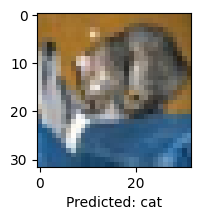

In [73]:
plot_sample_with_prediction(x_test, 0, cnn)